In [16]:
### sample coordinates: list of tuples - replace this with the original data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
df = pd.read_csv('euc_dataset.csv', index_col = 'Unnamed: 0')
df = df.dropna(subset=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'])
df_ = df[:10000]

In [25]:
# Example points in 2-dimensional space...
my_coords1 = [(1, 2), (3, 4),(3, 3), (8, 5)]
#my_coords.append((5, 6))
my_coords2 = [(4, 5), (1, 2),(3, 6), (7, 7)]

In [26]:
# timeit module
# To see how long it takes a program to run: once, on average over a bunch of runs, e.g. over k=10000 runs;
import timeit


### naive function  

In [29]:
import math
#simple euclidean distance calculation : manual 
def calculate_euclidean_distance_1(coords1,coords2):
    for i in range(0,len(coords1)):
        d1=(coords1[i][0]-coords2[i][0])** 2
        d2=(coords1[i][1]-coords2[i][1])** 2
        distance = math.sqrt(d1+d2)
        #print("Euclidean distance from x to y: ",distance)

In [30]:
calculate_euclidean_distance_1(my_coords1,my_coords2)

In [31]:
%timeit -n 100 calculate_euclidean_distance_1(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

7.12 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### using math lib and iterators

In [32]:
import math
#simple euclidean distance calculation : manual 
def calculate_euclidean_distance_2(coords1,coords2):
    for i in range(0,len(coords1)):
        distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(coords1[i],coords2[i])]))
        #print("Euclidean distance from x to y: ",distance)


In [33]:
calculate_euclidean_distance_2(my_coords1,my_coords2)

In [34]:
%timeit -n 100 calculate_euclidean_distance_2(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

10.7 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### using numpy

In [35]:
import numpy as np

def calculate_euclidean_distance_3(coords1,coords2):
    for i in range(0,len(coords1)):
        distance = np.sqrt(np.sum([np.square(a-b) for a, b in zip(coords1[i],coords2[i])]))
        #print("Euclidean distance from x to y: ",distance)




In [36]:
calculate_euclidean_distance_3(my_coords1,my_coords2)

In [37]:
%timeit -n 100 calculate_euclidean_distance_3(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

93.8 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### using numpy linalg.norm

In [38]:
import numpy as np

def calculate_euclidean_distance_4(coords1,coords2):
    for i in range(0,len(coords1)):
        distance = np.linalg.norm(np.array(coords1[i])-np.array(coords2[i])) 
        #print("Euclidean distance from x to y: ",distance)


In [39]:
calculate_euclidean_distance_4(my_coords1,my_coords2)

In [40]:
%timeit -n 100 calculate_euclidean_distance_4(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

60.4 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### use scipy

In [50]:

distance.euclidean(my_coords1[0],my_coords1[1])

2.8284271247461903

In [47]:
from scipy.spatial import distance

def calculate_euclidean_distance_5(coords1,coords2):
    for i in range(0,len(coords1)):
        dist= distance.euclidean(coords1[i],coords2[i]) 
        #print("Euclidean distance from x to y: ",dist)



In [72]:
calculate_euclidean_distance_5(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

In [75]:
%timeit -n 100 calculate_euclidean_distance_5(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

140 ms ± 3.97 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### using sklearn euclidean_distances

In [79]:
from sklearn.metrics.pairwise import euclidean_distances

def calculate_euclidean_distance_6(coords1,coords2):
    for i in range(0,len(coords1)):
        dist= euclidean_distances(np.array(coords1[i]).reshape(1, -1),np.array(coords2[i]).reshape(1, -1)) 
        #print("Euclidean distance from x to y: ",dist)


In [80]:
calculate_euclidean_distance_6(my_coords1,my_coords2)

In [ ]:
%timeit -n 100 calculate_euclidean_distance_6(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

### fastest function is calculate_euclidean_distance_2

### Function Call Overhead  + iterators ?

In [63]:
# pass the array instead of one element at a time?

import math
#simple euclidean distance calculation : manual 
def calc_eucl_dist_1(coords1,coords2):
    distances = []
    for i in range(len(coords1)):
        distances.append(math.sqrt(sum([(a - b) ** 2 for a, b in zip(coords1[i],coords2[i])])))
    return distances


In [64]:
#applying the function to the sample dataset

%timeit -n 100 calc_eucl_dist_1(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

#445 µs ± 158 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


1.27 ms ± 78.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
b =  calc_eucl_dist_2(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))


In [65]:
#use list comprehension
def calc_eucl_dist_2(coords1,coords2):
    distances = []
    [distances.append(math.sqrt(sum([(a - b) ** 2 for a, b in zip(coords1[i],coords2[i])]))) for i in range(len(coords1))]
    return distances



In [66]:
%timeit -n 100 calc_eucl_dist_2(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))
             
               

1.22 ms ± 58.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
a =  calc_eucl_dist_2(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))


In [67]:
#use map function
def calc_eucl_dist_3(coords1,coords2):
    distances = list(map(lambda x, y: math.sqrt(sum([(a - b) ** 2 for a, b in zip(x,y)])), coords1,coords2))
    return distances


In [68]:
%timeit -n 100 calc_eucl_dist_3(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))


1.16 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
c =  calc_eucl_dist_3(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))


### map function outperforms the for loop

In [9]:
def pairwise_python(coords1,coords2):
    M = len(coords1)
    D = np.empty((M), dtype=np.float)
    for i in range(M):
        d = 0.0
        for k in range(2):
            tmp = coords1[i][k] - coords2[i][k]
            d += tmp * tmp
        D[i] = np.sqrt(d)
    return D

%timeit -n10 pairwise_python(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

15.7 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
from numba import double
from numba.decorators import jit, autojit

pairwise_numba = autojit(pairwise_python)

#pairwise_numba = numba.jit(pairwise_python)
%timeit -n10 pairwise_numba(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))



The slowest run took 4.48 times longer than the fastest. This could mean that an intermediate result is being cached.
11.7 ms ± 8.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### cython

In [15]:
%load_ext Cython

In [16]:
%%cython

cimport numpy as np
cimport cython
from libc.math cimport sqrt

@cython.boundscheck(False)
@cython.wraparound(False)
def pairwise_cython(coords1,coords2):
    cdef int M = len(coords1)
    cdef float tmp, d
    cdef np.ndarray[double] D = np.ndarray(M)
    for i in range(M):
        d = 0.0
        for k in range(2):
            tmp = coords1[i][k] - coords2[i][k]
            d += tmp * tmp
        D[i] = sqrt(d)
    return D


In [17]:
%timeit -n10 pairwise_cython(list(zip(df_['pickup_latitude'], df_['pickup_longitude'])),list(zip(df_['dropoff_latitude'], df_['dropoff_longitude'])))

3.6 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# FINAL RUN

In [144]:
#final run
%timeit -n10 pairwise_cython(list(zip(df['pickup_latitude'], df['pickup_longitude'])),list(zip(df['dropoff_latitude'], df['dropoff_longitude'])))

1.35 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [145]:
df['distance'] = pairwise_cython(list(zip(df['pickup_latitude'], df['pickup_longitude'])),list(zip(df['dropoff_latitude'], df['dropoff_longitude'])))

In [147]:
df.groupby('pickup_community_area', as_index=False)['distance'].mean()

,pickup_community_area,distance
0,1.0,0.067243
1,2.0,0.061465
2,3.0,0.065420
3,4.0,0.056407
4,5.0,0.056654
5,6.0,0.055407
6,7.0,0.043656
7,8.0,0.038194
8,9.0,0.061717
9,10.0,0.063056


In [ ]:
df.groupby('pickup_community_area', as_index=False)['distance'].mean()

<BarContainer object of 8 artists>

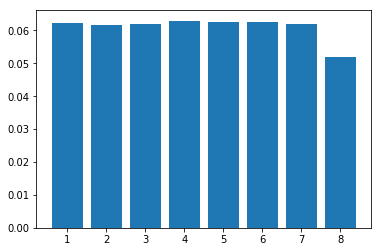

In [163]:
by_month = df.groupby('month', as_index=False)['distance'].mean()
plt.bar(by_month['month'],by_month['distance'])

<BarContainer object of 7 artists>

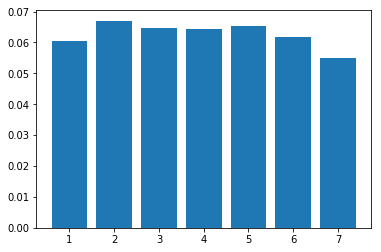

In [164]:
by_day = df.groupby('dayofweek', as_index=False)['distance'].mean()
plt.bar(by_day['dayofweek'],by_day['distance'])

In [154]:
by_year = df.groupby('year', as_index=False)['distance'].mean()

,year,distance
0,2017,0.062294


<BarContainer object of 24 artists>

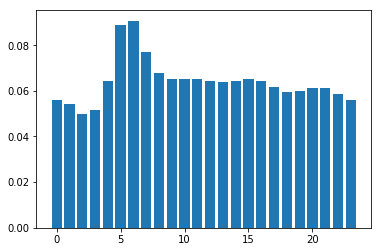

In [165]:
by_hour = df.groupby('hour', as_index=False)['distance'].mean()
plt.bar(by_hour['hour'],by_hour['distance'])